In [34]:
import numpy as np
import matplotlib
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
!ls ../

cuffdiff.long_vs_short_lived cuffdiff.transfer_groups     cuffdiff.wt16_vs_ymt         jups


In [253]:
# sl_sd = open('../cuffdiff.long_vs_short_lived/filtered_significant.diff', 'rU').read()
# sl_sd_a = np.array([i.split('\t') for i in sl_sd.split('\n')[:-1]])
# data_l = [i.split('\t') for i in sl_sd.split('\n')[:-1]][:-1]

ys = open('../cuffdiff.transfer_groups/gene_exp.diff', 'rU').read()
ys_a = np.array([i.split('\t') for i in ys.split('\n')[:-1]])
ys_l = [i.split('\t') for i in ys.split('\n')[:-1]][:-1]

ywt16 = open('../cuffdiff.wt16_vs_ymt/gene_exp.diff', 'rU').read()
ywt16_a = np.array([i.split('\t') for i in ywt16.split('\n')[:-1]])
ywt16_l = [i.split('\t') for i in ywt16.split('\n')[:-1]][:-1]

In [254]:
ywt16.split('\n')[0].split('\t') == ys.split('\n')[0].split('\t')

True

In [255]:
# datal2 = [ys_l[0]]+[i for i in datal[1:] if i[6] == 'OK']
# datal3 = [i for i in datal2[1:] if i[-5] != 'inf']
# datal4 = [i for i in datal3[1:] if i[-5] != '-inf']

In [256]:
ys_l2 = [ys_l[0]]+[ i for i in [ i for i in [i for i in ys_l[1:] if i[6] == 'OK'] if i[-5] != 'inf'] if i[-5] != '-inf']
ywt16_l2 = [ywt16_l[0]]+[ i for i in [ i for i in [i for i in ywt16_l[1:] if i[6] == 'OK'] if i[-5] != 'inf'] if i[-5] != '-inf']

In [257]:
ys_l2_s = sorted(ys_l2[1:], key=lambda x: (float(x[-5])))
ywt16_l2_s = sorted(ywt16_l2[1:], key=lambda x: (float(x[-5])))

In [290]:
# Filtering the least significantly ones
ys_l2_ss = [ i for i in ys_l2_s if float(i[-3]) < 0.05]
ywt16_l2_ss = [ i for i in ywt16_l2_s if float(i[-3]) < 0.05]

# Chosing the significantly different only
ys_l2_sig = [ i for i in ys_l2_s if i[-1] == 'yes']
ywt16_l2_sig = [ i for i in ywt16_l2_s if i[-1] == 'yes']

I want to get only 'gene', 'log2.FC', 'qvalue'

In [289]:
ys_l2_s2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ys_l2_s ] ]
ywt16_l2_s2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ywt16_l2_s ] ]

ys_l2_ss2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ys_l2_ss ] ]
ywt16_l2_ss2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ywt16_l2_ss ] ]

ys_l2_sig2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ys_l2_sig ] ]
ywt16_l2_sig2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in ywt16_l2_sig ] ]

In [266]:
class volc(object): 
    
    """ This class processes the input file to generate the axes for a volcano plot """

    def __init__(self, inp):
        self.inp = inp
        
        self.qvals = map(float, [ i[-2] for i in self.inp])
        self.logqneg = np.log(self.qvals)*(-1)
        self.fc = [i[1] for i in self.inp]
        self.genes = [i[0] for i in self.inp]   
        self.sig = ['sage' if i == 'yes' else 'sandybrown' for i in [i[-1] for i in self.inp] ]

In [267]:
vys = volc(ys_l2_s2)
vywt = volc(ywt16_l2_s2)

vyss = volc(ys_l2_ss2) 
vywtss = volc(ywt16_l2_ss2)

vys_sig = volc(ys_l2_sig2)
vywt_sig = volc(ywt16_l2_sig2)

Goal: I want to create a plot that shows both q-value and fold change in one plot for the same genes.
I would like to generate something similar to a volcano plot.

I will use a diagram with two y axes, following this guideline: http://matplotlib.org/examples/api/two_scales.html

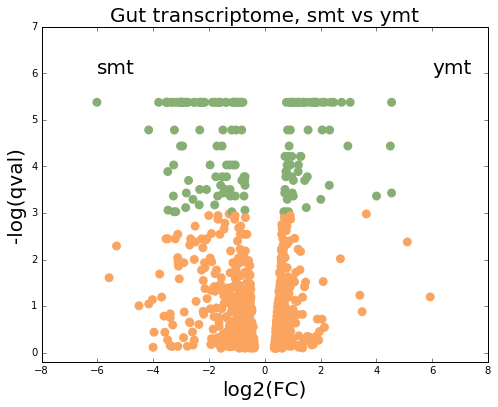

In [312]:
#fig, ax1 = plt.subplots()

font = {'family': 'courier',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

colors = vyss.sig

plt.figure(figsize=(8, 6), dpi=200)
plt.title('Gut transcriptome, smt vs ymt', fontdict=font)
#plt.scatter(vyss.fc, vyss.logqneg, color='green' )  
plt.scatter(vyss.fc, vyss.logqneg, c = colors, s=80, edgecolors='none')  
plt.xlabel('log2(FC)', fontdict=font)
plt.ylabel('-log(qval)', fontdict=font)
plt.text(-6, 6, 'smt', fontdict=font)
plt.text(6, 6, 'ymt', fontdict=font)
plt.ylim(-0.2,7)

# area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.show()

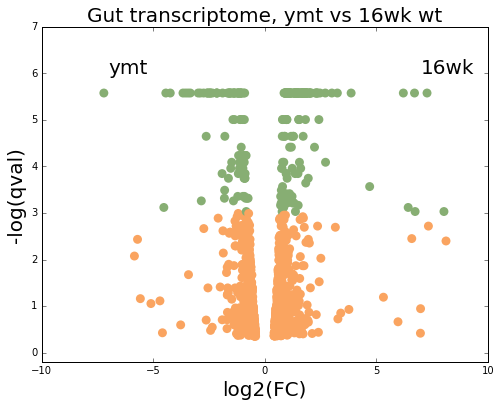

In [316]:
#fig, ax1 = plt.subplots()

font = {'family': 'courier',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

colors = vywtss.sig

plt.figure(figsize=(8, 6), dpi=200)
plt.title('Gut transcriptome, ymt vs 16wk wt', fontdict=font)
plt.scatter(vywtss.fc, vywtss.logqneg, c = colors, s=80, edgecolors='none')  
plt.xlabel('log2(FC)', fontdict=font)
plt.ylabel('-log(qval)', fontdict=font)
plt.xlim(-10, 10)
plt.ylim(-0.2,7)

plt.text(-7, 6, 'ymt', fontdict=font)
plt.text(7, 6, '16wk', fontdict=font)

plt.show()

**16-11-2016**  
Now I will do the same as yesterday, for the ymt vs smt+16wk

In [328]:
sl = open('../cuffdiff.long_vs_short_lived/gene_exp.diff', 'rU').read()
sl_a = np.array([i.split('\t') for i in sl.split('\n')[:-1]])
sl_l = [i.split('\t') for i in sl.split('\n')[:-1]][:-1]

sl_l2 = [sl_l[0]]+[ i for i in [ i for i in [i for i in sl_l[1:] if i[6] == 'OK'] if i[-5] != 'inf'] if i[-5] != '-inf']
sl_l2_s = sorted(sl_l2[1:], key=lambda x: (float(x[-5])))
sl_l2_ss = [ i for i in sl_l2_s if float(i[-3]) < 0.05]
sl_l2_ss2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in sl_l2_ss ] ]
sl_l2_sig = [ i for i in sl_l2_s if i[-1] == 'yes']
sl_l2_sig2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in sl_l2_sig ] ]
vsl = volc(sl_l2_ss2) 

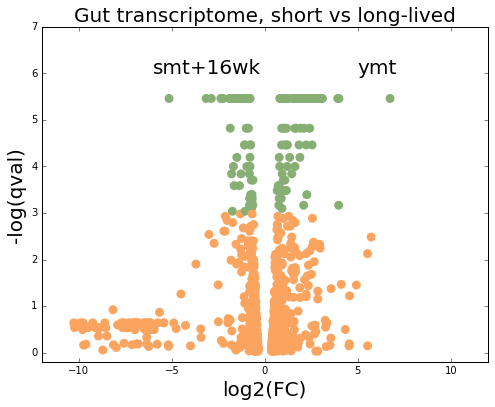

In [329]:
#fig, ax1 = plt.subplots()

font = {'family': 'courier',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

colors = vsl.sig

plt.figure(figsize=(8, 6), dpi=200)
plt.title('Gut transcriptome, short vs long-lived', fontdict=font)
plt.scatter(vsl.fc, vsl.logqneg, c = colors, s=80, edgecolors='none')  
plt.xlabel('log2(FC)', fontdict=font)
plt.ylabel('-log(qval)', fontdict=font)
plt.text(-6, 6, 'smt+16wk', fontdict=font)
plt.text(5, 6, 'ymt', fontdict=font)
plt.ylim(-0.2,7)
plt.xlim(-12,12)


plt.show()

In [330]:
class de(object):
    
    """This class separates the DEGs by sign and sorts them by qval or fc"""

    def __init__(self, inp):
        self.inp = inp
        
        self.pos = [i for i in self.inp if i[1][0]!='-']
        self.neg = [i for i in self.inp if i[1][0]=='-']

        self.sortfc_p = sorted(self.pos, key = lambda x: (float(x[1])))
        self.sortfc_n = sorted(self.neg, key = lambda x: (float(x[1])))
        self.sortq_p = sorted(self.pos, key = lambda x: (float(x[2])))
        self.sortq_n = sorted(self.neg, key = lambda x: (float(x[2])))

In [338]:
desl = de(sl_l2_sig2)
deys = de(ys_l2_sig2)
deywt16 = de(ywt16_l2_sig2)

In [327]:
# Below the line to get list of gene IDs for each comparison
','.join([ k.split('(')[0] if '(' in k else k for k in [ j.split('-')[0] for j in [i[0] for i in deys.sortq_p] ] ])

'DKK2,KAL1,TP53I3,BPI,MARCO,HCAR1,CXORF56,PLA2G1B,CR388416.1,IFI30,SLC13A5,NFURG05812010005,PLAUR,CASQ1,IL4I1,MB21D1,LYZ,CCL,SAA,CPNE4,POU2AF1,PDE6H,HSPG2,IGHV1,MUSK,HRASLS,CROT,IGHV1,NFURLNR40959010010,MAG,TNFAIP2,SI:DKEY,MPL,CLEC4E,GRK1B,IGLL1,NFURLNR36394010010,NCF1,CRP,SOUL5L,F8,NFURG03393110002,GPR133,FABP6,TLR1,ANG,IL5RA,PPP1R3C,ANGPTL6,BCKDHBL,PSAP,THBS1,APLNRB,DSCAM,DEPTOR,HBZ,PLEK,NFURLNR01660030010,SI:DKEY,GSTZ1,NFURLNR27281011000,IL10RA,TLX1,CU459095.1,RLN3,CXCL10,GBA,DNASE2,SLC34A2'

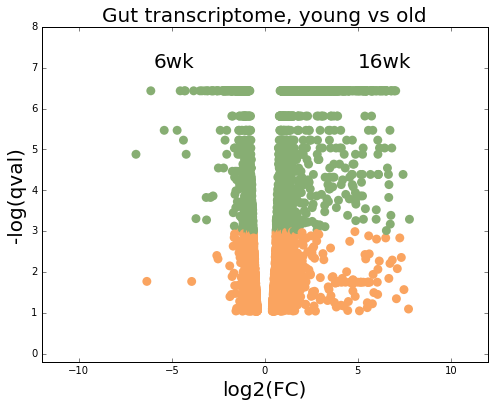

In [336]:
# Here I process the 6wk vs the 16wk expression data

yo = open('../cuffdiff.young_vs_old/old_vs_young.gene_exp.diff', 'rU').read()
yo_a = np.array([i.split('\t') for i in yo.split('\n')[:-1]])
yo_l = [i.split('\t') for i in yo.split('\n')[:-1]][:-1]

yo_l2 = [yo_l[0]]+[ i for i in [ i for i in [i for i in yo_l[1:] if i[6] == 'OK'] if i[-5] != 'inf'] if i[-5] != '-inf']
yo_l2_s = sorted(yo_l2[1:], key=lambda x: (float(x[-5])))
yo_l2_ss = [ i for i in yo_l2_s if float(i[-3]) < 0.05]
yo_l2_ss2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in yo_l2_ss ] ]
yo_l2_sig = [ i for i in yo_l2_s if i[-1] == 'yes']
yo_l2_sig2 = [j.split(',') for j in [i[2] + ',' + i[9] + ',' + i[12] + ',' + i[-1] for i in yo_l2_sig ] ]
vyo = volc(yo_l2_ss2) 

#fig, ax1 = plt.subplots()

font = {'family': 'courier',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

colors = vyo.sig

plt.figure(figsize=(8, 6), dpi=200)
plt.title('Gut transcriptome, young vs old', fontdict=font)
plt.scatter(vyo.fc, vyo.logqneg, c = colors, s=80, edgecolors='none')  
plt.xlabel('log2(FC)', fontdict=font)
plt.ylabel('-log(qval)', fontdict=font)
plt.text(-6, 7, '6wk', fontdict=font)
plt.text(5, 7, '16wk', fontdict=font)
plt.ylim(-0.2,8)
plt.xlim(-12,12)


plt.show()

In [342]:
deyo = de(yo_l2_sig2)
#','.join([ k.split('(')[0] if '(' in k else k for k in [ j.split('-')[0] for j in [i[0] for i in deyo.sortq_n] ] ])